### 계층적 군집화
- 여러개의 군집중에서 유사도가 가장 높은 군집 2개를 선택하여 하나로 합치면서 군집수를 줄여가는 방법
- 처음에는 모든 군집이 하나의 데이터만을 가지고 군집을 합쳐가면서 최종적으로 하나의 군집만 남게 됨
- 모든 두 군집간의 거리를 계산 > 거리가 가장 가까운 것 2개를 묶음 > 하나의 군집으로 합쳐질 때까지 반복

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np
X = np.array([[i] for i in [0,1,2,3,5,8,13,21,30,50,80,120]])
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  5],
       [  8],
       [ 13],
       [ 21],
       [ 30],
       [ 50],
       [ 80],
       [120]])

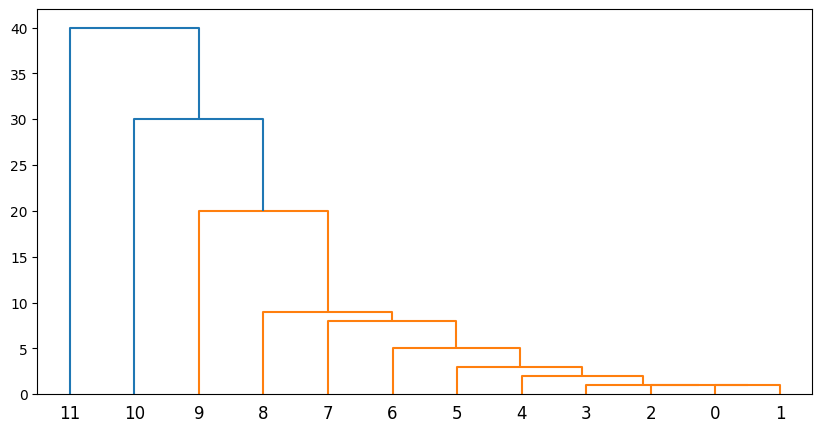

In [1]:
# single 두 군집의 가장 가까운 샘플의 거리를 기준으로 계산
Z = linkage(X, 'single')  
plt.figure(figsize=(10, 5))
dendrogram(Z) # dendro 나무(라틴어)
plt.show()    # 숫자는 데이터의 인덱스임. y축의 높이: 거리임

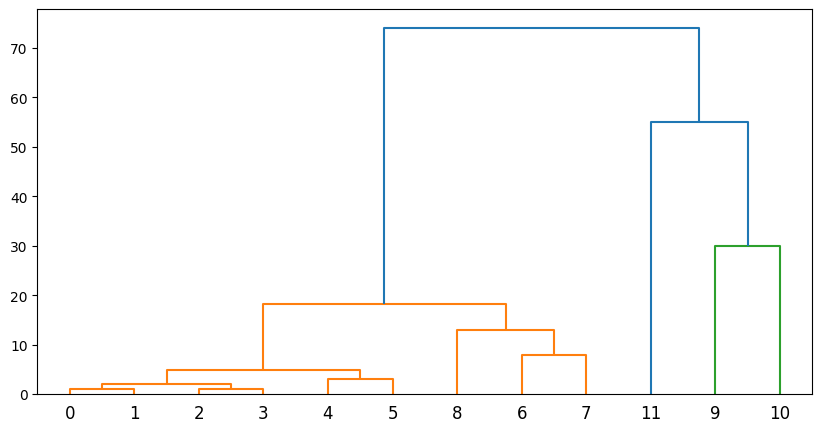

In [2]:
# leaf: 샘플의 인덱스
# leaf의 순서와 가로방향으로 얼마나 가까운지는 의미가 없고
# branch가 합쳐지는 순간의 세로축의 거리가 두 그룹의 유사도를 알려주는 척도

# average: 두 군집의 모든 데이터의 평균거리를 기준으로 구분
Z = linkage(X, 'average')   
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

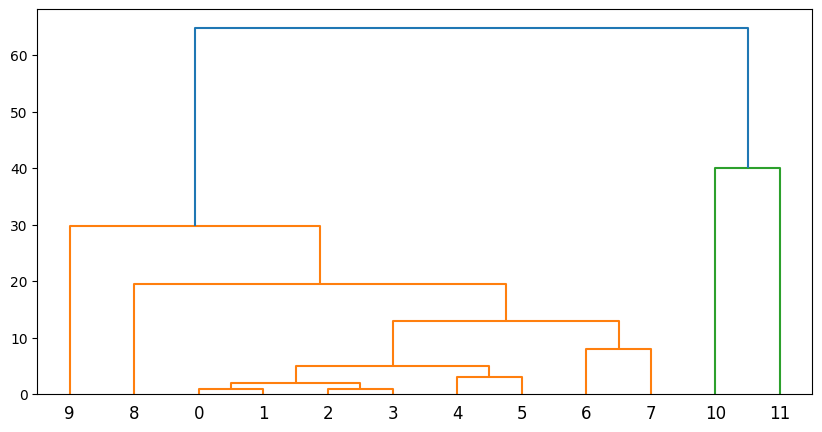

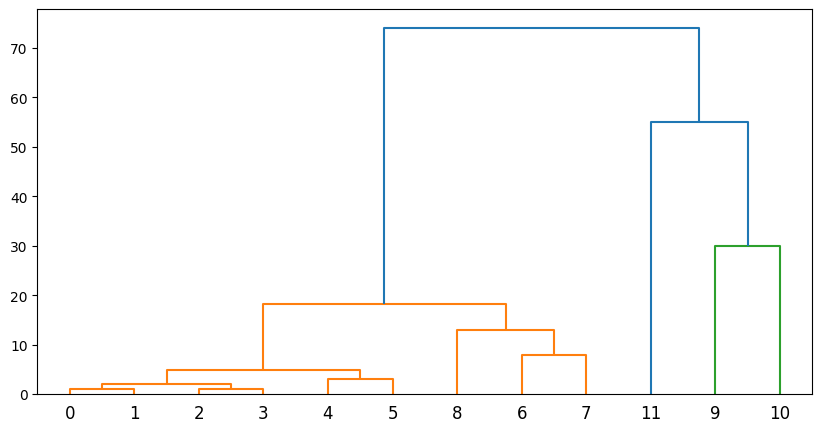

In [3]:
# 가중 거리 방식
# 군집a와 군집b를 합쳐서 군집 c를 만들었다면
# 군집c와 군집d의 거리는  a와 d의 거리, b와 d의 거리의 평균을 사용하는 방식

Z = linkage(X, 'weighted')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

# 두 군집의 중심점의 거리를 기준으로 계산
Z = linkage(X, 'centroid')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

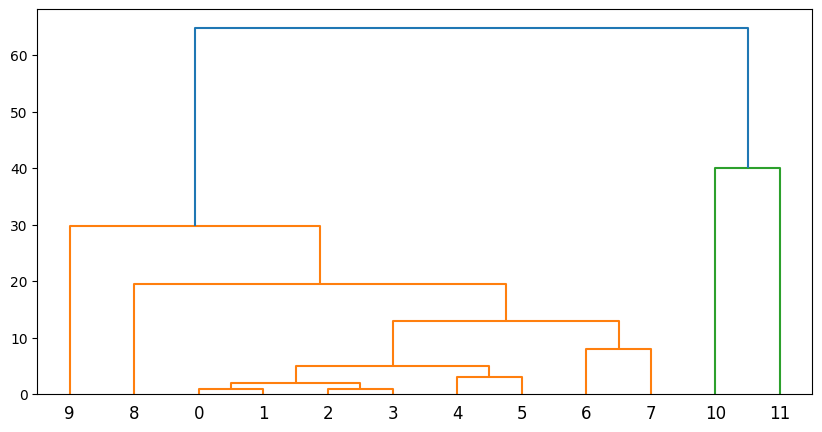

In [4]:
# 두 군집을 결합하여 새로운 군집을 만든 경우 두 군집의 중심점의 중앙값을 중심으로 계산
# 군집의 모든 데이터와의 평균거리를 계산하는 방식보다 속도가 빠른 장점이 있음
Z = linkage(X, 'median')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

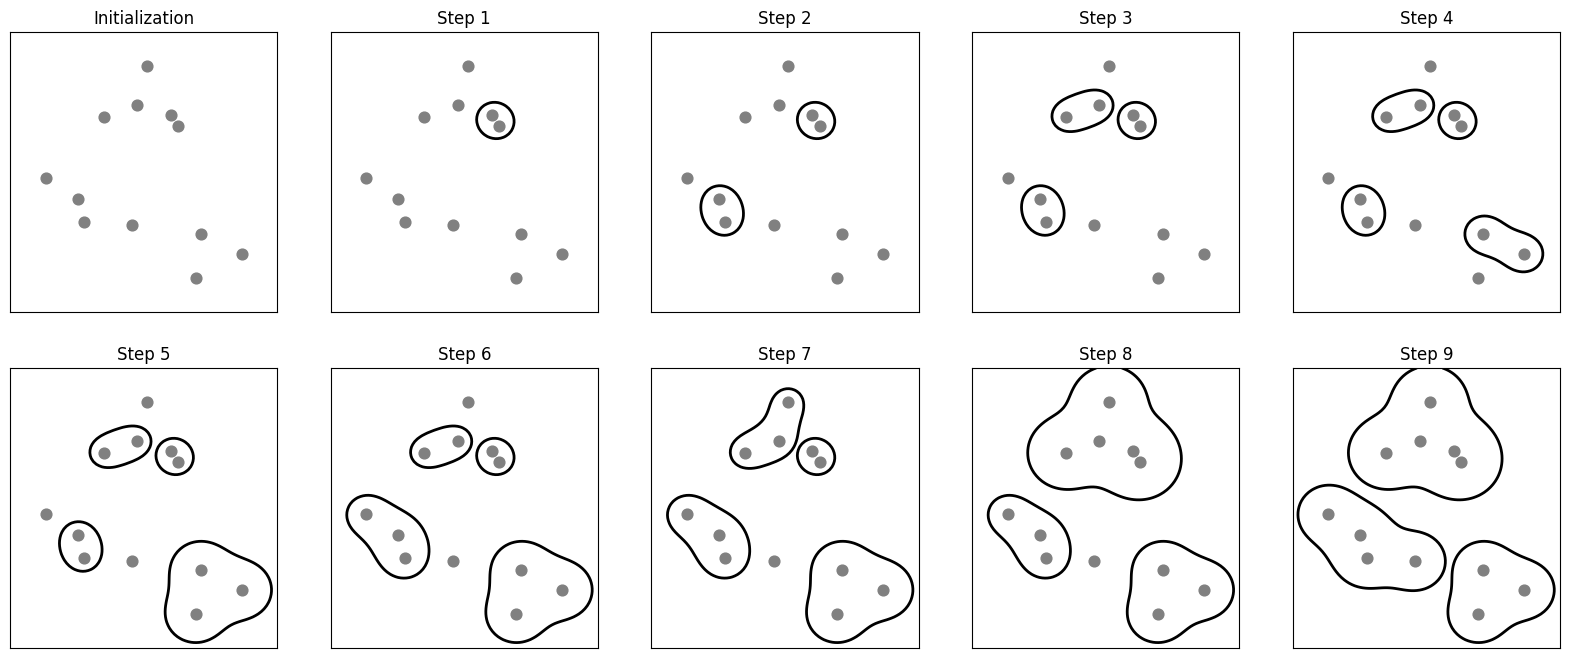

In [5]:
# 시작할 때 각 포인트를 하나의 클러스터로 지정하고 가장 비슷한 두 클러스터를 합치는 방식
# 계층구조로 확장됨

import mglearn
mglearn.plots.plot_agglomerative_algorithm()

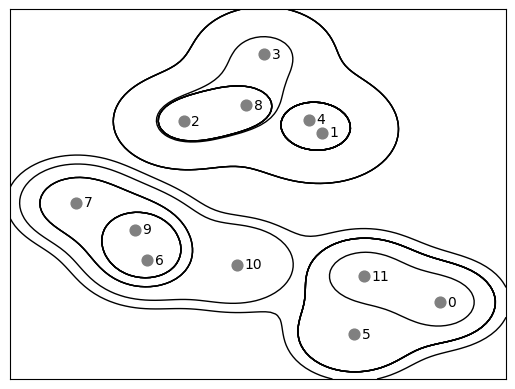

In [6]:
mglearn.plots.plot_agglomerative()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1416\2192546937.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1416\2192546937.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1416\2192546937.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)


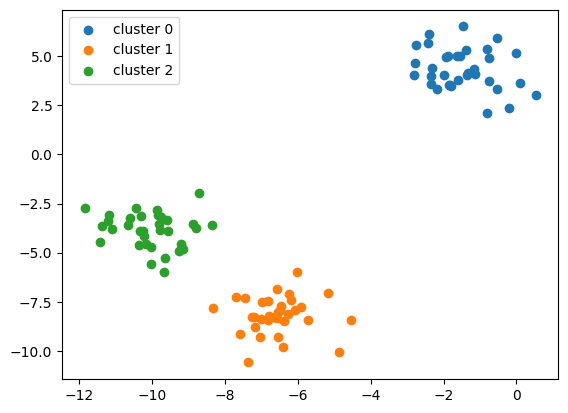

In [7]:
# 계층적 클러스터링

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
x1 = np.hstack([X, a])

# 각 클래스별로 데이터 추출
x_0 = x1[x1[:, 2]==0, :]
x_1 = x1[x1[:, 2]==1, :]
x_2 = x1[x1[:, 2]==2, :]

# 시각화
plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

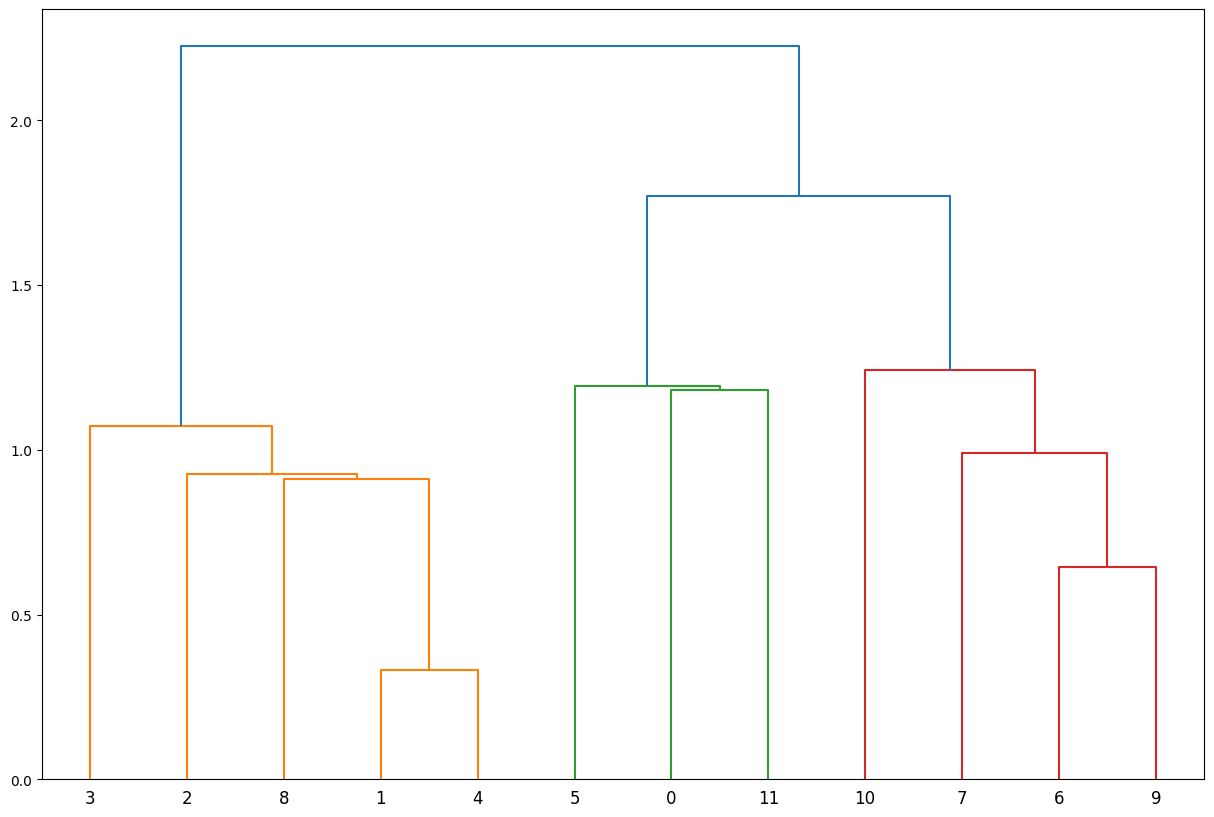

In [8]:
# 위에서 만든 모형에 대한 이해를 하기 위하여 덴드로그램을 화면에 출력

from scipy.cluster.hierarchy import dendrogram, linkage
X, y = make_blobs(random_state=0, n_samples=12)
Z = linkage(X, 'single')
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.show()

### DBSCAN: 밀도기반 군집화

- kmeans의 단점 : 군집의 모양에 따라 잘 작동하지 않을 수 있음, 군집 개수를 직접 지정해야 함
- DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 군집화 : 갯수를 지정할 필요가 없음
    - 데이터의 밀도에 기반한 군집화
    - 포인트가 많이 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식
    - 어떤 포인트를 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
    - 군집의 갯수를 사용자가 지정할 필요가 없음
    - 최소거리(이웃을 정의하기 위한 거리), 최소 데이터 갯수(밀집지역을 정의하기 위해 필요한 이웃의 갯수)

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


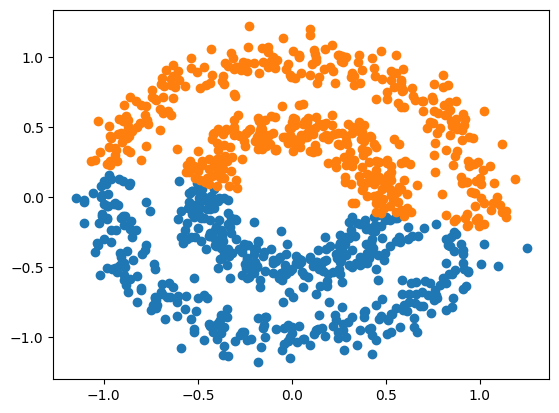

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np
np.random.seed(2)

# factor : 내부 원과 외부 원 사이의 비율
X1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X1)
plt.scatter(X1[model.labels_ == 0, 0], X1[model.labels_ == 0, 1])
plt.scatter(X1[model.labels_ == 1, 0], X1[model.labels_ == 1, 1])    

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


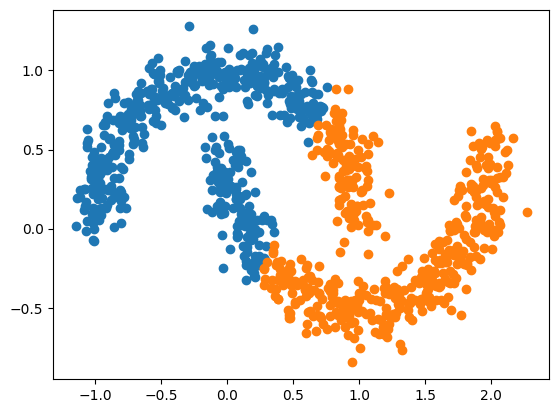

In [12]:
from sklearn.datasets import make_moons

X2, y2 = make_moons(n_samples=1000, noise=.1)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X2)
plt.scatter(X2[model.labels_ == 0, 0], X2[model.labels_ == 0, 1])
plt.scatter(X2[model.labels_ == 1, 0], X2[model.labels_ == 1, 1])   

↑ 위와 같은 데이터를 DBSCAN으로 하면 분류가 잘 됨

DBSCAN(eps=3, min_samples=2)
[ 0  0  0  1  1  2  2 -1]


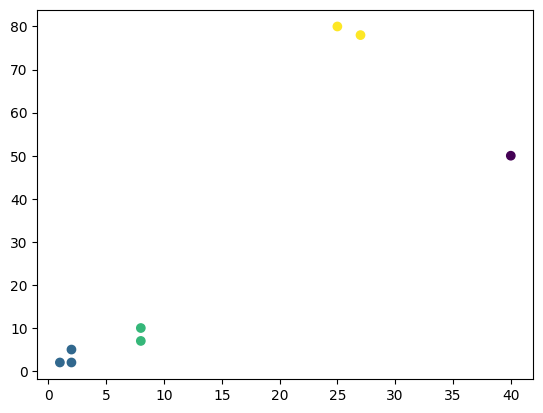

In [13]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 5],
              [8, 7], [8, 10], [25, 80], [27,78], [40,50]])

model = DBSCAN(eps=3, min_samples=2).fit(X)
# 최소거리 3, 최소샘플갯수 2개 
# eps(epsilon) : 이웃을 정의하기 위한 거리, 기본값 0.5
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역 안의 데이터 갯수, 기본값 5

print(model)
plt.scatter(X[:,0],X[:,1],c=model.labels_)
print(model.labels_) #3개로 나눠짐(-1은 노이즈가 있는 데이터: 아웃라이어)

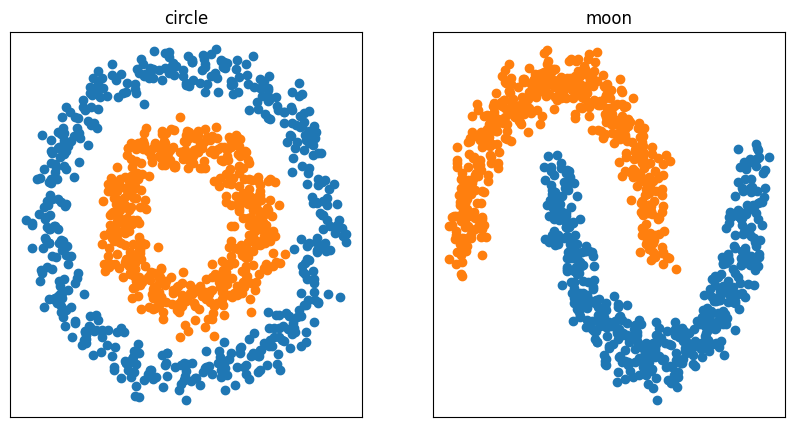

In [14]:
def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)

### ex) Iris

In [26]:
import pandas as pd
import seaborn as sns

# df = sns.load_dataset('iris')
df = pd.read_csv('Data/iris.csv')
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [4]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [27]:
cols=df.columns[:-2]
X=df[cols]
y=df['Species']

In [28]:
type(y)

pandas.core.series.Series

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
y = pd.DataFrame(y)
type(y)

pandas.core.frame.DataFrame

In [29]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = DBSCAN(eps=0.5,min_samples=5)
pipeline = make_pipeline(scaler, model)
    # 작업순서. scaler, model 저장
pred = pd.DataFrame(pipeline.fit_predict(X))
pred.columns=['predict']
result = pd.concat([X,y,pred],axis=1)
result

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,-1


In [30]:
# 노이즈가 있는 샘플들은 -1로 처리됨
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [31]:
result['SepalLength']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 150, dtype: float64

Text(0.5, 1.0, 'clustering')

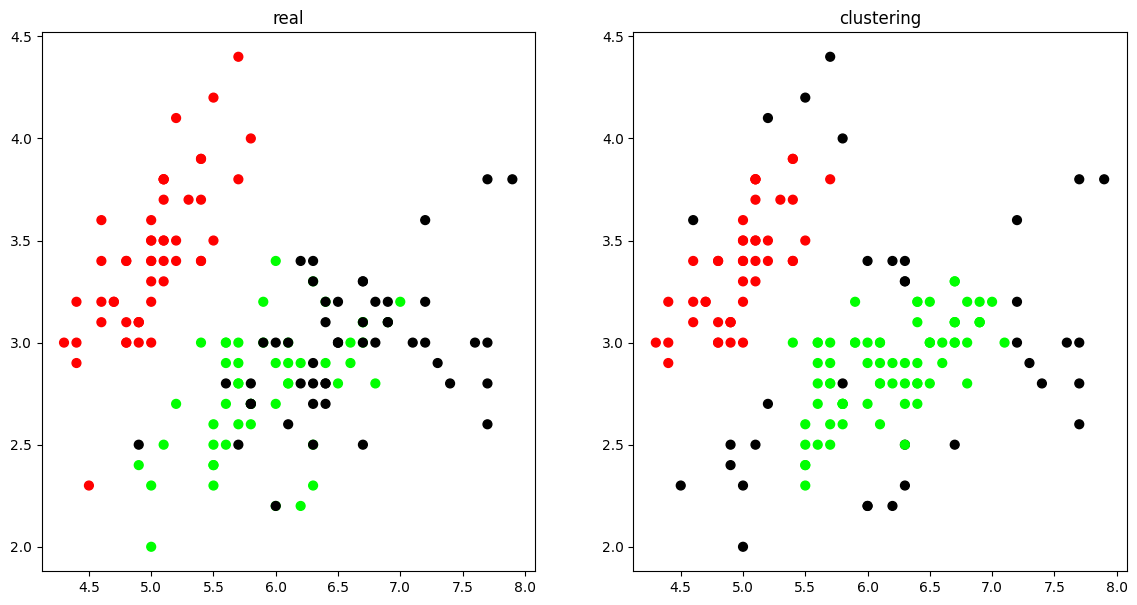

In [32]:
import numpy as np
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')

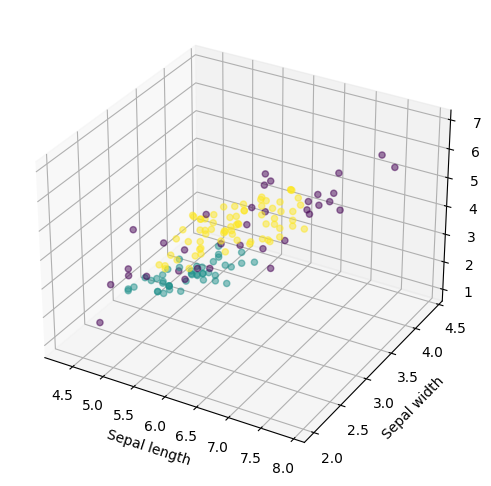

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))
# rect : 축의 위치 left, bottom, width, height
# elev 고도보기 각도(기본값 30), azim 방위각(기본값 -60)
ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(result['SepalLength'],result['SepalWidth'],result['PetalLength'],c=result['predict'],alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()